<a href="https://colab.research.google.com/github/ehsanh123/machine-learning/blob/main/Roce_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/MyDrive/python/Ali New Spreadsheet.xlsx')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#data prepartions

In [202]:
# Step 1: Load dataset
#data = pd.read_excel('Ali New Spreadsheet.xlsx')
# Define EMPA and Laser columns
empa_columns = ['CaO', 'SiO2', 'Cr2O3', 'Na2O', 'TiO2', 'MnO', 'MgO', 'FeO', 'Al2O3', 'K2O', 'Mg#']
laser_columns = ['Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Rb',
                 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
                 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']

# Normalize EMPA and Laser Ablation columns
scaler = StandardScaler()
# data[empa_columns] = scaler.fit_transform(data[empa_columns])
# data[laser_columns] = scaler.fit_transform(data[laser_columns])


In [203]:
missing_columns = data.columns[data.isnull().any()]
print(missing_columns)

Index(['Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Ca.1', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Co', 'Ni', 'Cu', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce',
       'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Pb', 'Th', 'U'],
      dtype='object')


In [204]:
# # #find the columns with string in the information instedd of flaot
# # #turn them into flaot

# # # Assuming 'colm' represents the columns you want to convert to numeric
colm = data.select_dtypes(include=['O']).columns
#colm[2:]
print(colm[2:])
# Iterate over the columns in 'colm' and apply pd.to_numeric
for col in colm[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

#print(data.select_dtypes(include=['O']))

Index(['Cr2O3', 'Li', 'Be', 'B', 'Cr', 'Ni', 'Cu', 'Rb', 'Cs', 'Ba', 'Pb'], dtype='object')
                SAMPLE      Lab
0     KL2023-07-19-4_1   Lisbon
1     KL2023-07-19-4_2   Lisbon
2     KL2023-07-19-4_3   Lisbon
3     KL2023-07-19-4_4   Lisbon
4     KL2023-07-19-4_5   Lisbon
..                 ...      ...
648  KL2023-07-25-8_56  Utrecht
649  KL2023-07-25-8_57  Utrecht
650  KL2023-07-25-8_58  Utrecht
651  KL2023-07-25-8_59  Utrecht
652  KL2023-07-25-8_60  Utrecht

[653 rows x 2 columns]


In [197]:
missing_columns = data.columns[data.isnull().any()]
print(missing_columns)

Index(['Cr2O3', 'Li', 'Be', 'B', 'Mg', 'Si', 'Ca', 'Ca.1', 'Sc', 'Ti', 'V',
       'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U'],
      dtype='object')


In [165]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'column_name' is the column you're interested in
null_rows = data[data['SAMPLE'].isnull()]

# Display the rows with null values
print(null_rows)

Empty DataFrame
Columns: [SAMPLE, Lab, CaO, SiO2, Cr2O3, Na2O, TiO2, MnO, MgO, FeO, Al2O3, K2O, Mg#, Li, Be, B, Mg, Si, Ca, Ca.1, Sc, Ti, V, Cr, Mn, Co, Ni, Cu, Rb, Sr, Y, Zr, Nb, Cs, Ba, La, Ce, Pr, Nd, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Hf, Ta, Pb, Th, U, C, M, R, T]
Index: []

[0 rows x 58 columns]


#EMPA Models

In [206]:

# Step 4: Prepare Data for Classification
X = data.copy()  # Features (EMPA + Laser measurements)
X = X[empa_columns]
y = data['T'].copy()  # Target variable (rock age classes)

X[empa_columns] = scaler.fit_transform(X[empa_columns])
#X[laser_columns] = scaler.fit_transform(X[laser_columns])
print(X.shape)
print(y.shape)
# Step 5: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(653, 11)
(653,)


##model1

In [207]:

# Step 6: Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Classifier Accuracy: 0.7786

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        53
           2       0.74      0.87      0.80        45
           3       0.86      0.58      0.69        33

    accuracy                           0.78       131
   macro avg       0.80      0.76      0.76       131
weighted avg       0.79      0.78      0.77       131



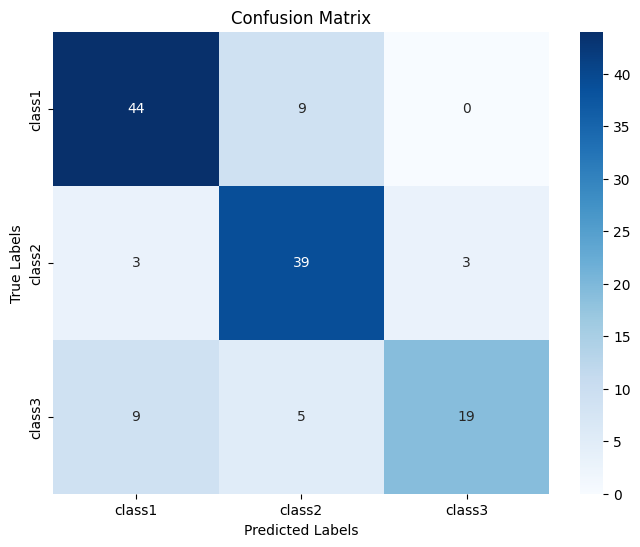

In [208]:

# Example: y_test and y_pred
# Assuming y_test and y_pred are already defined as 1D arrays or Series
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', \
            xticklabels=['class1', 'class2','class3'], yticklabels=['class1', 'class2','class3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##model2

In [169]:
# Step 7: XGBoost Classifier with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
# Before fitting the XGBoost model
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

xgb_model = XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train1)

# Best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate the XGBoost Model

y_pred_xgb = best_xgb_model.predict(X_test)
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test1, y_pred_xgb):.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test1, y_pred_xgb))

print(y_test1.shape[0])


Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGBoost Classifier Accuracy: 0.7634

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        53
           1       0.72      0.84      0.78        45
           2       0.84      0.64      0.72        33

    accuracy                           0.76       131
   macro avg       0.78      0.75      0.76       131
weighted avg       0.77      0.76      0.76       131

131


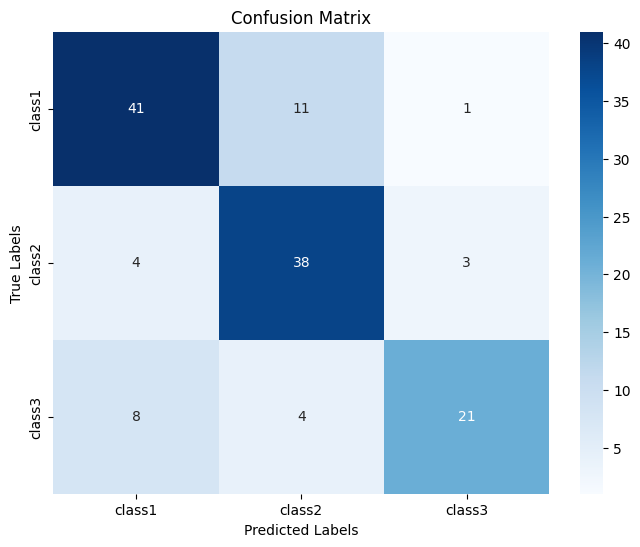

In [170]:


# Example: y_test and y_pred
# Assuming y_test and y_pred are already defined as 1D arrays or Series
conf_matrix = confusion_matrix(y_test1, y_pred_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', \
            xticklabels=['class1', 'class2','class3'], yticklabels=['class1', 'class2','class3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##model3

In [209]:
# Before fitting the model, one-hot encode y_train and y_test
from tensorflow.keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
y_train2[:,1:].shape

(522, 3)

In [210]:
y_train2[:,1:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.3805 - loss: 1.1197 - val_accuracy: 0.3714 - val_loss: 1.0994
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4523 - loss: 1.0917 - val_accuracy: 0.3810 - val_loss: 1.0862
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3992 - loss: 1.0828 - val_accuracy: 0.4000 - val_loss: 1.0740
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4472 - loss: 1.0730 - val_accuracy: 0.4762 - val_loss: 1.0626
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4422 - loss: 1.0588 - val_accuracy: 0.5619 - val_loss: 1.0526
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4828 - loss: 1.0383 - val_accuracy: 0.5524 - val_loss: 1.0432
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5601 - loss: 1.0114 - val_accuracy: 0.5429 - val_loss: 1.0336
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5558 - loss: 1.0125 - val_accuracy: 0.5429 - val_loss: 1.0240
Epoch 9/50


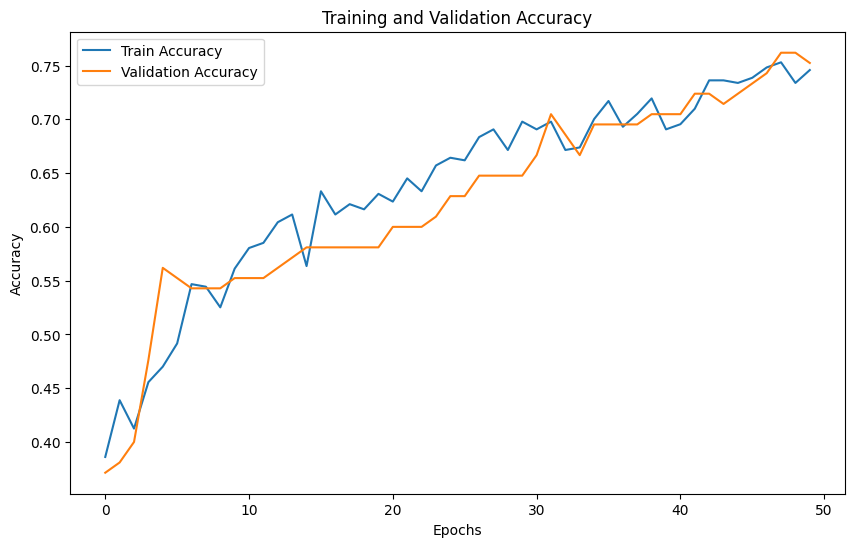

Deep Learning Classifier Accuracy: 0.6870


In [214]:

# Step 8: Deep Learning Classifier
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    #Dense(len(np.unique(y_train2[1:])), activation='softmax')  # For multi-class classification
    Dense(3, activation='softmax')
])

# Compile the deep learning model with categorical cross-entropy loss and accuracy metric
dl_model.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history = dl_model.fit(X_train, y_train2[:,1:],
                       epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Predict using Deep Learning Model
y_pred_dl = dl_model.predict(X_test)

# Step 9: Plot Training and Validation Accuracy (Deep Learning)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step 10: Evaluate the Deep Learning Model
dl_accuracy = dl_model.evaluate(X_test, y_test2[:,1:], verbose=0)[1]
print(f"Deep Learning Classifier Accuracy: {dl_accuracy:.4f}")


XGBoost Classifier Accuracy: 0.5573

Classification Report (XGBoost):
              precision    recall  f1-score   support

           1       0.51      0.83      0.63        53
           2       0.63      0.58      0.60        45
           3       0.75      0.09      0.16        33

    accuracy                           0.56       131
   macro avg       0.63      0.50      0.47       131
weighted avg       0.61      0.56      0.50       131

131


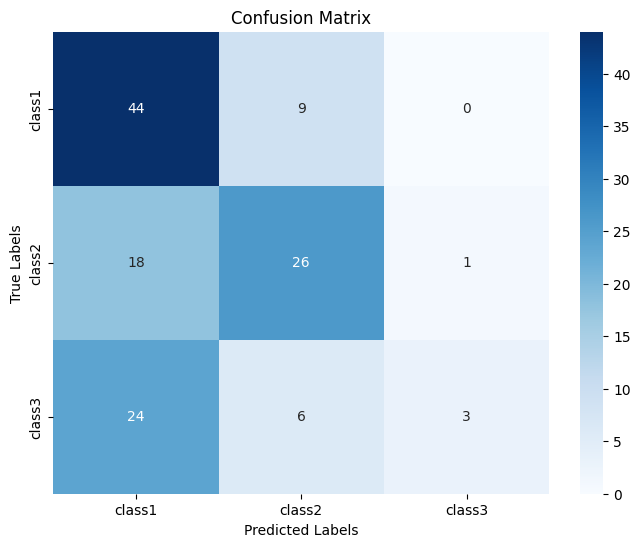

In [215]:
#y_pred_xgb = best_xgb_model.predict(X_test)
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test, original_labels):.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, original_labels))

print(y_test1.shape[0])

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: y_test and y_pred
# Assuming y_test and y_pred are already defined as 1D arrays or Series
conf_matrix = confusion_matrix(y_test, original_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', \
            xticklabels=['class1', 'class2','class3'], yticklabels=['class1', 'class2','class3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#laser model

In [219]:
# Step 4: Prepare Data for Classification
X = data.copy()

X=X.dropna()

y = X['T']  # Target variable (rock age classes)
X = X[empa_columns+laser_columns]
print(X.shape)
print(y.shape)

(189, 51)
(189,)


In [220]:
# # #find the columns with string in the information instedd of flaot
# # #turn them into flaot

# # # Assuming 'colm' represents the columns you want to convert to numeric
colm = X.select_dtypes(include=['O']).columns
#colm[2:]
print(colm)
# Iterate over the columns in 'colm' and apply pd.to_numeric
for col in colm:
    X[col] = pd.to_numeric(X[col], errors='coerce')

#print(X[colm[0]].dtype)

Index(['Cr2O3', 'Li', 'Be', 'B', 'Cr', 'Ni', 'Cu', 'Rb', 'Cs', 'Ba', 'Pb'], dtype='object')


##Model1

In [221]:
# Step 5: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Random Forest Classifier with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf_model, param_grid=rf_param_grid,
    cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Classifier Accuracy: 0.8684

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       1.00      0.67      0.80        15
           2       0.79      1.00      0.88        11
           3       0.86      1.00      0.92        12

    accuracy                           0.87        38
   macro avg       0.88      0.89      0.87        38
weighted avg       0.89      0.87      0.86        38



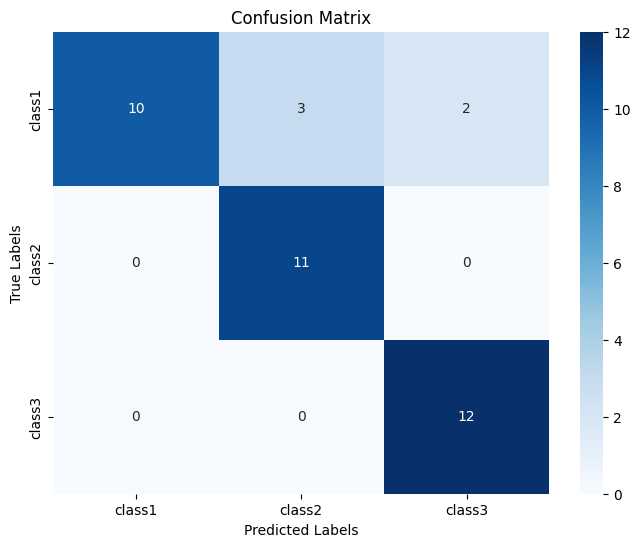

In [222]:

# Example: y_test and y_pred
# Assuming y_test and y_pred are already defined as 1D arrays or Series
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', \
            xticklabels=['class1', 'class2','class3'], yticklabels=['class1', 'class2','class3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

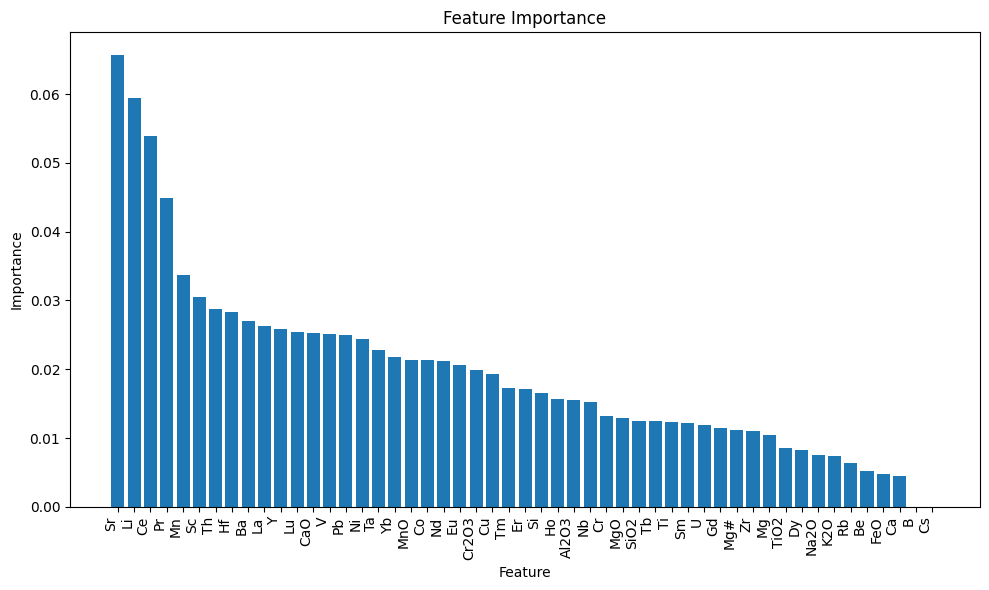

In [226]:
def featuer_imp(model,X_train):
  # Get feature importances
  importances = model.feature_importances_

  # Create a DataFrame to associate feature names with importances
  feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

  # Sort the DataFrame by importance in descending order
  feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

  # Print or visualize the feature importances
  #print(feature_importances_df)

  # Visualize with a bar plot
  plt.figure(figsize=(10, 6))
  plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
  #plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
  plt.xticks(rotation=90, ha='right')
  plt.xlabel('Feature')
  plt.ylabel('Importance')
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()
featuer_imp(best_rf_model,X_train)